<a href="https://colab.research.google.com/github/AngSuAnz/clinica_de_datos/blob/main/LinceM_SuarezA_Trabajo_final_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Metodos Cuantitativos Aplicados a Estudios Urbanos** \\
Profesor Ricardo Pasquini \\
Universidad Torcuato Di Tella \\
rpasquini@gmail.com

En este trabajo final vamos a analizar si el gradiente de alquileres asociado a la teoria de la aglomeracion, ha cambiado a raiz del COVID. Analizaremos  ciudades seleccionadas de América Latina, utilizando datos de Properati. (https://www.properati.com.ar/data/). Cada grupo trabajara con una única ciudad.

**Importante:**


*   El trabajo se realiza en grupos de hasta 2 personas.
*   Las instrucciones para registrar su grupo y ciudad están en el sitio del campus UTDT de la materia. Deben buscar Trabajo Final.
*   La entrega se realiza **exclusivamente** mediante el Campus UTDT.
*  Para responder a las preguntas agregue celdas de código o texto al notebook.

**Deadline de Entrega:**

1ero de Octubre de 2020 (Ayuda Marty McFly!!!!!!)

# Preparacion del ambiente de trabajo y e importación del geodataframe

In [34]:
!pip install geopandas==0.9.0

In [35]:
!pip install contextily

In [36]:
import geopandas as gpd
import statsmodels.api as sm
import contextily as cx
import matplotlib.pyplot as plt

En la siguiente celda de codigo, modifique el nombre de ciudad correspondiente a la ciudad con la que va a trabajar. Las opciones son: "amba40", "bogota", "cali", "cordoba", "medellin", "rosario", "lima", "montevideo"

In [43]:
ciudad='medellin'
gdf=gpd.GeoDataFrame.from_file("https://github.com/rpasquini/urban_gradient_and_covid/tree/main/data/2022"+ciudad+".zip?raw=true")

HTTPError: ignored

# Un primer vistazo de los datos
Utilice el siguiente código para mapear sus datos (no es necesario hacer cambios en el código)  

NameError: ignored

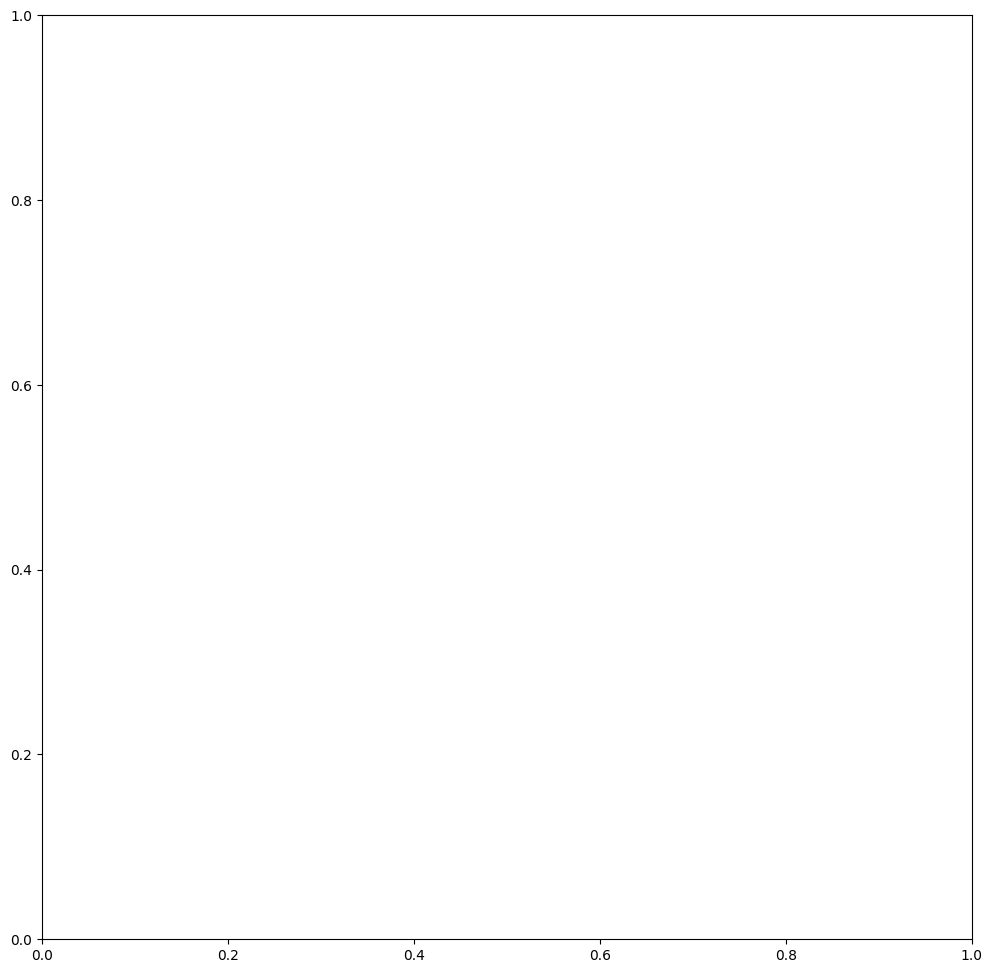

In [44]:
fig, ax = plt.subplots(figsize=(12, 12))
gdf.to_crs("EPSG:4326").plot(ax=ax,column='adjprice', legend=True)
#ax.set_xlim(-59.2, -58)
#ax.set_ylim(-35, -34.1)
cx.add_basemap(ax, crs=gdf.to_crs(epsg=4326).crs.to_string(), source=cx.providers.Stamen.TonerLite)
ax.axis('off')
plt.title(ciudad)

Recuerde que también puede mapear el GeoDataFrame con la el método plot (sin incluir otras referencias)

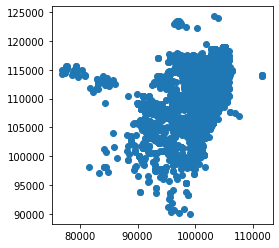

In [ ]:
gdf.plot()

Vamos a trabajar eliminar el 5% de las propiedades de mayor precio de manera de evitar problemas de outliers. Ejecute la siguiente celda para conservar el 95% inferior de la distribución (es decir, eliminar el 5% de outliers).

In [ ]:
gdf=gdf.loc[gdf.price<gdf.price.quantile(.95)]

Utilice un histograma para evaluar si se eliminaron observaciones atípicas de la distribución del precio. Nota: si el procedimiento no fue suficiente considere eliminar un porcentaje mayor de datos.

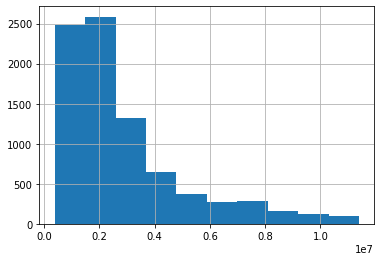

In [ ]:
gdf.price.hist()

Las variables disponibles en el dataframe son las siguientes:

In [ ]:
gdf.columns

Index(['type', 'type_i18n', 'country', 'developmen', 'operation', 'operation_',
       'rooms', 'bedrooms', 'bathrooms', 'surface_to', 'surface_co', 'price',
       'currency', 'price_peri', 'title', 'lat', 'lon', 'l1', 'l2', 'l3', 'l4',
       'l5', 'l6', 'distanciaC', 'start_mont', 'start_year', 'infla',
       'adjprice', 'geometry'],
      dtype='object')

Nos interesan las siguientes:
- 'bedrooms': Numero de habitaciones
- 'surface_to': Superficie total
- 'price': Valor de alquiler en la moneda local
- 'start_mont' Mes en que se empezo a ofrecer el anuncio. Ojo que dice mont y no month.
- 'start_year': Año en el que se comenzó a ofrecer
- 'adjprice': Precio ajustado por inflacion (Utilice esta variable si analizará una ciudad de Argentina u otra que haya experimentado fuerte inflación)
- 'distanciaC': Distancia al centro de negocios o *central business district* CBD.


# Preguntas  

# Pregunta 1
Estimaremos un modelo para identificar la presencia de un gradiente urbano. Nuestra intención es verificar si existe una relación entre la distancia al centro de negocios de la ciudad y el valor de los alquileres.  

Propondremos inicialmente la estimación del siguiente modelo


$$
alquiler_i=\beta_0+\beta_1distanciaC_i+\epsilon_i
$$

\\
Donde $alquiler_i$ es el valor del alquiler del inmueble $i$, y $distanciaC_i$ representa la distancia respecto al Centro de Negocios de la ciudad en cuestión. La distancia está computada en metros. \\

La moneda del alquiler depende de la ciudad en cuestión (ver detalles en planilla de referencias)


**Importante:** Los que trabajen con datos de Argentina deben utilizar la variable *adjprice* en vez de *price*


1.a Estime el modelo. Interprete los coeficientes estimados. \\


1.b. Proponga un test de hipótesis para probar si la variable $distancia$ al centro de negocios tiene un efecto en el alquiler. Cuál es el resultado del test para su caso en particular? \\


1.c Evalue la **bondad de ajuste** del modelo sobre la variabilidad del alquiler. Proponga una medida e interprete los resultados de la estimación del modelo de regresión. \\


1.d ¿Qué dicen los resultados sobre la hipótesis de efectos de la aglomeracion en el valor del alquiler?

# Pregunta 2
En base a los resultados del modelo anterior: \\
a. Realice una predicción para el valor de un alquiler a 100 metros del CBD \\


b. Realice una predicción para el valor de un alquiler a 5km del CBD. \\


c. Realice un grafico cross-plot con las distancias al CBD en el eje horizontal y los precios en el eje vertical. Superponga la predicción del modelo. Ayuda: puede consultar este [notebook](https://github.com/rpasquini/metodos_cuantitativos_2022/blob/main/1_Introduccion.ipynb)

## Pregunta 3

a. En términos de la teoría: ¿Qué implicancia tiene el cumplimiento del supuesto de normalidad de los errores? Explique.



b. Analice el cumplimiento del supuesto normalidad de los errores del modelo utilizando los resultados de su regresión (Pregunta 1). Utilice para ello alguno de los gráficos de diagnóstico sobre los mismos que  vimos en clase.
 ¿Presentan los residuos una distribución normal? \\


b. ¿Puede considerarse válido el test de hipótesis realizado en el punto 1.b en este caso particular? ¿Por qué si o por qué no?


## Pregunta 4

Proponga una transformación en la forma funcional del modelo (por ejemplo $log(y)$). Explique por qué podría ayudar al cumplimiento del supuesto de  normalidad de los errores. Reestime el modelo con la transforación propuesta. Provea una interpretación de los coeficientes obtenidos luego de la transformación.

## Pregunta 5

Siguiendo con el objetivo de identificar el efecto de la aglomeración usando la distancia al CBD, vamos a considerar ahora la incorporación del control de la superficie del departamento como una variable de control. \\


a. En términos téoricos: ¿Es la superficie del departamento una  variable *relevante* que no puede ser omitida? ¿Por
   qué si o por qué no? (Sugerencia: Utilice la definición de variable *relevante* que dimos en clase)


b. Deberia modificarse el efecto de la distancia al incorporar la superficie del departamento al modelo? ¿Por qué si o por qué no?  (Sugerencia: examine la relación entre superficie y distancia)


 c.Incorpore la superificie del departamento al modelo que está trabajando (Al de la Pregunta 1, o al de la Pregunta 4 si lo cree más conveniente). Compute el modelo y explique todos los resultados. En particular, compare los resultados del coeficiente que acompaña a distancia antes y después de la incorporación del control.

# Pregunta 6
Ahora vamos a considerar la incorporación del control adicional de la cantidad de habitaciones del departamento. Es decir, sin perder nuestro objetivo de estimar el efecto distancia, consideraremos la inclusión de la cantidad de habitaciones como un control.  \\


a. En términos téoricos, y para los efectos de entender el efecto de la aglomeracion (distanciaCBD): ¿Es la cantidad de habitaciones una variable relevante que no puede ser omitida? ¿Por qué si o por qué no? \\


b.Incorpore la cantidad de habitaciones al modelo. Compute el modelo y explique todos los resultados. En particular, compare los resultados del coeficiente que acompaña a distancia antes y después de la incorporación del nuevo control. \\


c. ¿Cómo cambió el coeficiente de la variable superficie al incorporar la cantidad de habitaciones al modelo? ¿Cómo se explica este cambio?

# Pregunta 7
Las variables **start_year** y **start_mont** presentan la informacion del año y mes en el que el anuncio se publicó respectivamente. \\
a. Genere una variable dummy para identificar las observaciones posteriores al advenimiento del covid en marzo 2020 (i.e., 1 si es posterior a marzo 2020 y 0 de otro modo) \\
b. Ingrese la variable dummy al modelo con el que viene trabajando. Interprete los coeficientes del modelo.

# Pregunta 8

En esta punto vamos a indagar la hipótesis de que el COVID afectó el gradiente urbano de alquileres. Vamos a estimar el siguiente modelo:

$$
alquiler_i=\beta_0+\beta_1distanciaC_i+\beta_2Post_t+\beta_3Interaccion_{t,i}+\epsilon_i
$$

donde:
*  $Post_t$ es una variable dummy que identifica si la oferta fue realizada posterior a marzo 2020 y 0 de otro modo (calculada en el punto anterior).
* $$Interaccion_{t,i}=distanciaC_i * Post_t$$
Es decir, la variable $Interaccion_{t,i}$ es la multiplicación de la variable $Distancia$ por la variable dummy $Post$. *Esta es una variable que usted debera generar por separado.* Note además, que esta variable activará un efecto adicional para la distancia sólo para aquellas observaciones en el período definido como Post.\\


a. Estime el modelo. Interprete los coeficientes obtenidos. \\



b. Es $\beta_3$ estadisticamente significativo? ¿Cómo se interpreta este resultado? \\


c. (Opcional) Realice un grafico de las predicciones del modelo contra la variable distancia, de manera similar al punto 2.c


d. ¿Cuáles son sus conclusiones en relacion al efecto del Covid sobre el gradiente de alquileres?

#Pregunta 9 (opcional)
Realice una hipótesis adicional relacionada al efecto de la pandemia que pueda testear en base a los datos provistos. Especifique el modelo y testee su hipótesis.